    Instruções:
        1- Plote neste notebook os gráficos, mapas e visualizações (interativas ou não) que você acha que fazem sentido para o desafio.
        

# Análise e Visualização do Desmatamento em Minas Gerais


In [1]:
#Importando bibliotecas

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import plotly.express as px

#

A primeira ação que precisa ser realizada é o upload dos arquivos salvos do notebook anterior (02_analise.ipynb).




In [2]:
#Importando os arquivos
arquivo1 = "/content/df_merged_mg.csv"
df = gpd.read_file(arquivo1)

# Verificar os primeiros registros
df.head(5)

,municipio,populacao,PIB,area_ha
0,Abadia dos Dourados,6365.0,176773.658,58.093077496685055
1,Abaeté,23161.0,541239.206,21.020223556525444
2,Abre Campo,14312.0,262686.538,0.0
3,Acaiaca,3997.0,64907.018,0.0
4,Açucena,8995.0,165823.625,0.0


In [3]:
#Importando os arquivos
arquivo2 = "/content/desmatamento_mg_por_municipio.geojson"
df2 = gpd.read_file(arquivo2)

# Verificar os primeiros registros
df2.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,area_m2,area_ha,area_km2,mes,municipio,geometry
0,1.0,6726,9696,26/07/2022,2022-08-05,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,152270.566768,15.227057,0.152271,8,Frutal,"POLYGON ((65610.256 7779397.013, 65659.326 777..."
1,2.0,6727,9700,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,742292.005763,74.229201,0.742292,7,Campina Verde,"POLYGON ((31696.271 7842130.438, 31989.678 784..."
2,3.0,6728,9701,21/07/2022,2022-07-26,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,25647.680020,2.564768,0.025648,7,Comendador Gomes,"POLYGON ((50597.259 7823297.562, 50665.831 782..."
3,4.0,6729,9702,21/07/2022,2022-08-05,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,33140.891916,3.314089,0.033141,8,Comendador Gomes,"POLYGON ((50538.446 7823306.388, 50636.036 782..."
4,5.0,6730,9703,21/07/2022,2022-08-05,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,806717.990913,80.671799,0.806718,8,Comendador Gomes,"POLYGON ((67719.523 7822648.62, 67877.128 7822..."


In [12]:
# Somar áreas desmatadas por Bioma
soma_bioma = df2.groupby('Bioma')['area_km2'].sum()
print("Soma por Bioma:")
print(soma_bioma)

# Somar áreas desmatadas por NuFis
soma_nufis = df2.groupby('NuFis')['area_km2'].sum()
print("\nSoma por NuFis:")
print(soma_nufis)

# Somar áreas desmatadas por mês
soma_mes = df2.groupby('mes')['area_km2'].sum()
print("\nSoma por mês:")
print(soma_mes)

# Top 10 municípios com maior área desmatada
top10 = df2.groupby(['municipio', 'NuFis'])['area_km2'].sum().nlargest(10)
print("Top 10 municípios com maior área desmatada e suas NuFis:")
print(top10)


Soma por Bioma:
Bioma
Caatinga           58.671766
Cerrado           234.941821
Mata Atlântica    118.017844
Name: area_km2, dtype: float64

Soma por NuFis:
NuFis
Alto Paranaíba           47.619232
Alto São Francisco       11.087289
Central Metropolitana     9.066804
Jequitinhonha            18.377158
Leste                    12.883127
Nordeste                 10.767701
Noroeste                 66.209746
Norte                    99.554537
Sul                      21.239121
Triângulo Mineiro        97.933245
Zona da Mata             16.893469
Name: area_km2, dtype: float64

Soma por mês:
mes
6      4.920207
7     41.910768
8     78.745960
9    286.054495
Name: area_km2, dtype: float64
Top 10 municípios com maior área desmatada e suas NuFis:
municipio      NuFis            
Paracatu       Noroeste             16.993613
Jaíba          Norte                13.021985
Uberaba        Triângulo Mineiro    11.553715
Santa Vitória  Triângulo Mineiro    10.766537
Capinópolis    Triângulo Mineiro 

# Vizualizações


# Somatória

##
Qual Bioma e qual Macroregião tiveram a maior área desmatada total?

/tmp/ipython-input-3837418564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soma_bioma.index, y=soma_bioma.values, palette="viridis")


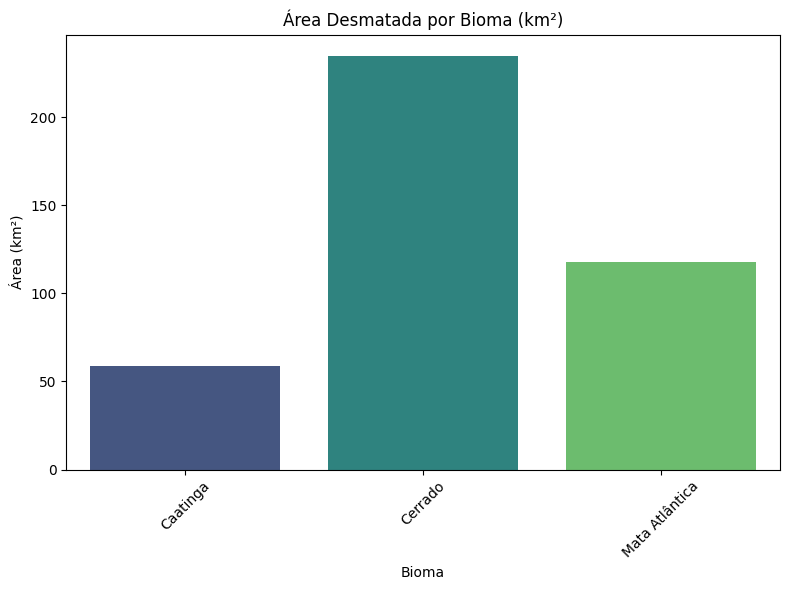

/tmp/ipython-input-3837418564.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soma_nufis.index, y=soma_nufis.values, palette="magma")


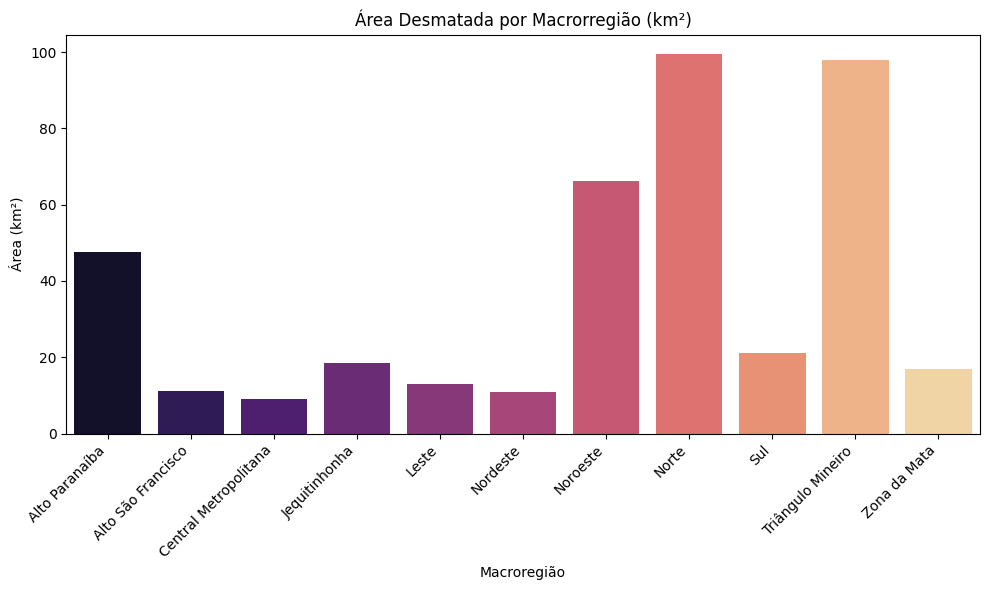

In [5]:
# Bioma
plt.figure(figsize=(8,6))
sns.barplot(x=soma_bioma.index, y=soma_bioma.values, palette="viridis")
plt.title("Área Desmatada por Bioma (km²)")
plt.ylabel("Área (km²)")
plt.xlabel("Bioma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Macroregião (NuFis)
plt.figure(figsize=(10,6))
sns.barplot(x=soma_nufis.index, y=soma_nufis.values, palette="magma")
plt.title("Área Desmatada por Macrorregião (km²)")
plt.ylabel("Área (km²)")
plt.xlabel("Macroregião")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
# Bioma
df_bioma = pd.DataFrame({'Bioma': soma_bioma.index, 'Área (km²)': soma_bioma.values})
fig_bioma = px.bar(df_bioma, x='Bioma', y='Área (km²)', color='Bioma',
                   title="Área Desmatada por Bioma (km²)")
# Remover valores dentro das barras
fig_bioma.update_traces(text=None)
fig_bioma.show()

# NuFis (Macroregião)
df_nufis = pd.DataFrame({'NuFis': soma_nufis.index, 'Área (km²)': soma_nufis.values})
fig_nufis = px.bar(df_nufis, x='NuFis', y='Área (km²)', color='NuFis',
                   title="Área Desmatada por Macrorregião (km²)")
fig_nufis.update_traces(text=None)
fig_nufis.show()

##
Qual o mês teve maior área desmatada total?


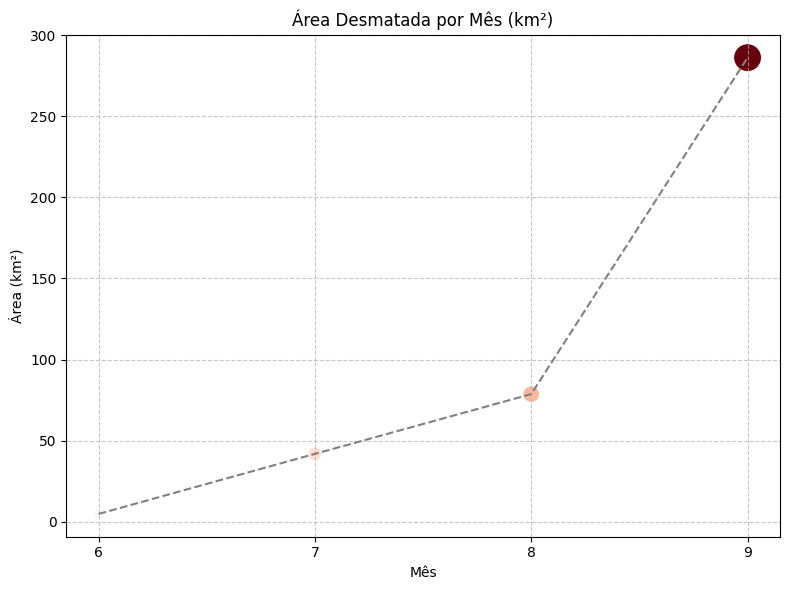

In [8]:
# Preparar os dados
df_mes = pd.DataFrame({'Mês': soma_mes.index, 'Área (km²)': soma_mes.values})

# Dispersão por mês com grade
plt.figure(figsize=(8,6))

# Gráfico de dispersão
sns.scatterplot(x=df_mes['Mês'], y=df_mes['Área (km²)'],
                size=df_mes['Área (km²)'], hue=df_mes['Área (km²)'],
                palette="Reds", sizes=(50, 400), legend=False)

# Adicionar linha de tendência (ligando os pontos)
sns.lineplot(x=df_mes['Mês'], y=df_mes['Área (km²)'],
             color="gray", linestyle="--")

plt.title("Área Desmatada por Mês (km²)")
plt.xlabel("Mês")
plt.ylabel("Área (km²)")
plt.xticks(df_mes['Mês'])  # garantir que só apareçam os meses que existem

# Adicionar grade
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()



In [9]:
# Gráfico de dispersão
fig_mes = px.scatter(df_mes, x='Mês', y='Área (km²)',
                     size='Área (km²)',  # opcional: tamanho do marcador proporcional à área
                     color='Área (km²)',  # opcional: cor proporcional à área
                     title="Área Desmatada por Mês (km²)",
                     hover_data={'Mês': True, 'Área (km²)': True})

# Adicionar linha para tendência
fig_mes.add_traces(px.line(df_mes, x='Mês', y='Área (km²)').data)

fig_mes.show()


##
Quais os municípios mais desmataram no total e sua macrorregião?

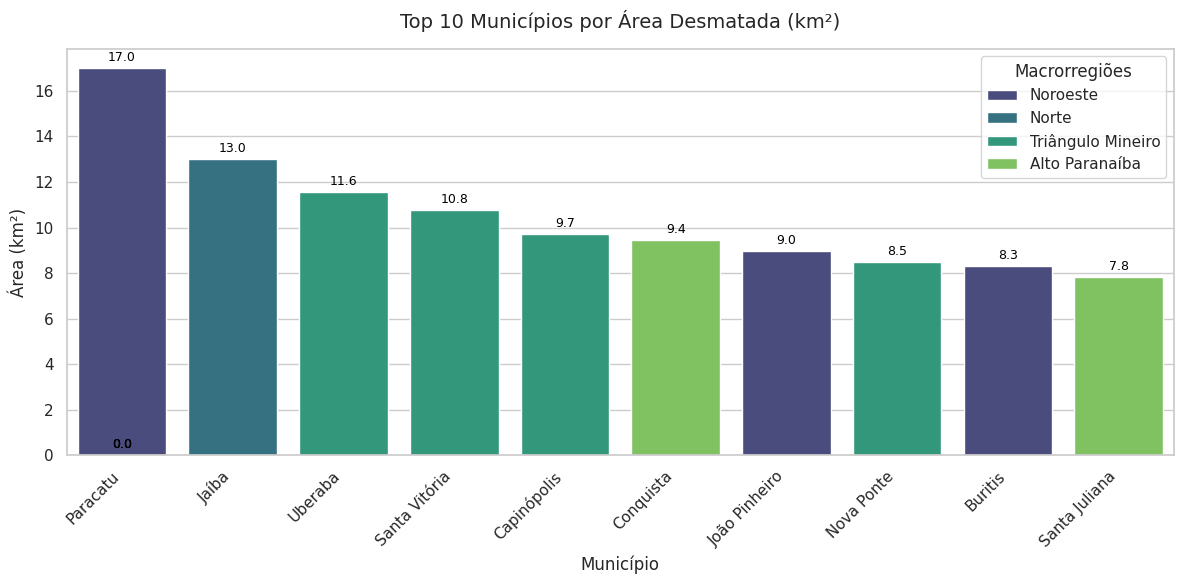

In [10]:
top10_municipios = (
    df2.groupby(['municipio', 'NuFis'])['area_km2']
    .sum()
    .reset_index()
    .sort_values(by='area_km2', ascending=False)
    .head(10)
)

# Definir estilo
sns.set_theme(style="whitegrid")

# Criar figura
plt.figure(figsize=(12, 6))

# Gráfico de barras
ax = sns.barplot(
    data=top10_municipios,
    x="municipio",
    y="area_km2",
    hue="NuFis",
    palette="viridis"
)

# Adicionar rótulos nas barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color="black", xytext=(0, 3),
        textcoords="offset points"
    )

# Ajustes de layout
ax.set_title("Top 10 Municípios por Área Desmatada (km²)", fontsize=14, pad=15)
ax.set_xlabel("Município", fontsize=12)
ax.set_ylabel("Área (km²)", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.legend(title="Macrorregiões")
plt.tight_layout()
plt.show()


In [11]:
# Preparar dados
top10_municipios = (
    df2.groupby(['municipio', 'NuFis'])['area_km2']
    .sum()
    .reset_index()
    .sort_values(by='area_km2', ascending=False)
    .head(10)
)

# Gráfico interativo
fig = px.bar(
    top10_municipios,
    x='municipio',
    y='area_km2',
    color='NuFis',
    title='Top 10 Municípios por Área Desmatada (km²)',
    hover_data={'municipio': True, 'NuFis': True, 'area_km2': True},
    text='area_km2'  # adiciona os valores
)

# Ajustes de layout
fig.update_layout(
    xaxis_title='Municípios',
    yaxis_title='Área (km²)',
    xaxis={'categoryorder':'total descending'},  # ordena pelo valor
    width=900,
    height=500,
    legend_title_text="Macrorregião"  # altera título da legenda
)

# Melhorar visualização dos textos
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.show()


# Distribuições

##
Distribuição de áreas desmatadas por Bioma

Ao analisar os dados de desmatamento por Bioma, observamos que a maior parte dos registros ocorre em faixas de áreas menores, geralmente entre 0 e 50 hectares. As faixas maiores, acima de 100 hectares, são relativamente raras, indicando que eventos de desmatamento muito extensos são exceções e provavelmente outliers.

Cerrado: concentra a maior parte dos desmatamentos em pequenas áreas (53%), mas apresenta alguns casos maiores, chegando a mais de 200 ha (menos de 1%)

Mata Atlântica: segue padrão similar, com predominância de desmatamentos menores (69%) e poucos eventos de grande escala.

Caatinga: quase todos os desmatamentos estão na faixa de 0-50 ha (mais de 90%), com eventos acima de 100 ha sendo muito raros.

Em resumo, os desmatamentos por Bioma tendem a ser pequenos e frequentes, enquanto grandes desmatamentos são isolados.

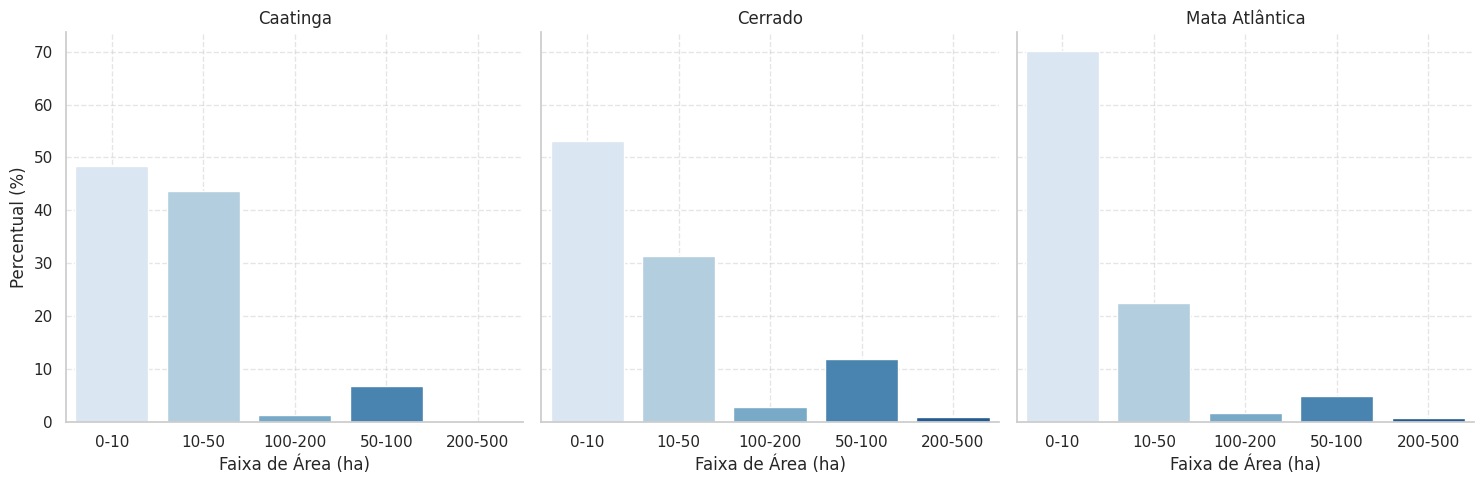

In [14]:
# Definir faixas de área (em hectares)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular número de registros por Bioma e faixa
percentual_faixas_bioma = df2.groupby(['Bioma', 'faixa_area']).size().reset_index(name='count')

# Transformar em percentual por Bioma
percentual_faixas_bioma['Percentual (%)'] = percentual_faixas_bioma.groupby('Bioma')['count'].transform(lambda x: x / x.sum() * 100)

g = sns.catplot(
    data=percentual_faixas_bioma,
    x="faixa_area",
    y="Percentual (%)",
    hue="faixa_area",
    col="Bioma",
    kind="bar",
    col_wrap=3,   # controla quantos gráficos por linha
    palette="Blues"
)

g.set_titles("{col_name}")
g.set_axis_labels("Faixa de Área (ha)", "Percentual (%)")

for ax in g.axes.flatten():
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


In [15]:
# Definir faixas de área (em hectares)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular número de registros por Bioma e faixa
percentual_faixas_bioma = df2.groupby(['Bioma', 'faixa_area']).size().reset_index(name='count')

# Transformar em percentual por Bioma
percentual_faixas_bioma['Percentual (%)'] = percentual_faixas_bioma.groupby('Bioma')['count'].transform(lambda x: x / x.sum() * 100)

# Gráfico de barras agrupadas por Bioma
fig = px.bar(percentual_faixas_bioma, x='faixa_area', y='Percentual (%)', color='faixa_area',
             facet_col='Bioma', title='Distribuição de Áreas Desmatadas por Faixa e Bioma',
             labels={'faixa_area':'Faixa (ha)', 'Percentual (%)':'% dos casos'},
             category_orders={'faixa_area': labels})

fig.update_layout(showlegend=False)
fig.show()


##
Distribuição de áreas desmatadas por Mês

Quando analisamos os desmatamentos por mês, observamos padrões semelhantes:

A maioria das áreas desmatadas está na faixa 0-50 ha em todos os meses.

Em meses específicos, como setembro, há registros de desmatamentos muito grandes (acima de 200 ha), que aumentam a média, mas não refletem a maioria dos casos.

As faixas intermediárias (50-100 ha ou 100-200 ha) aparecem esporadicamente e representam poucos registros percentualmente.

Portanto, mesmo ao longo dos meses, os desmatamentos pequenos dominam a distribuição, enquanto eventos muito grandes são outliers e distorcem médias.


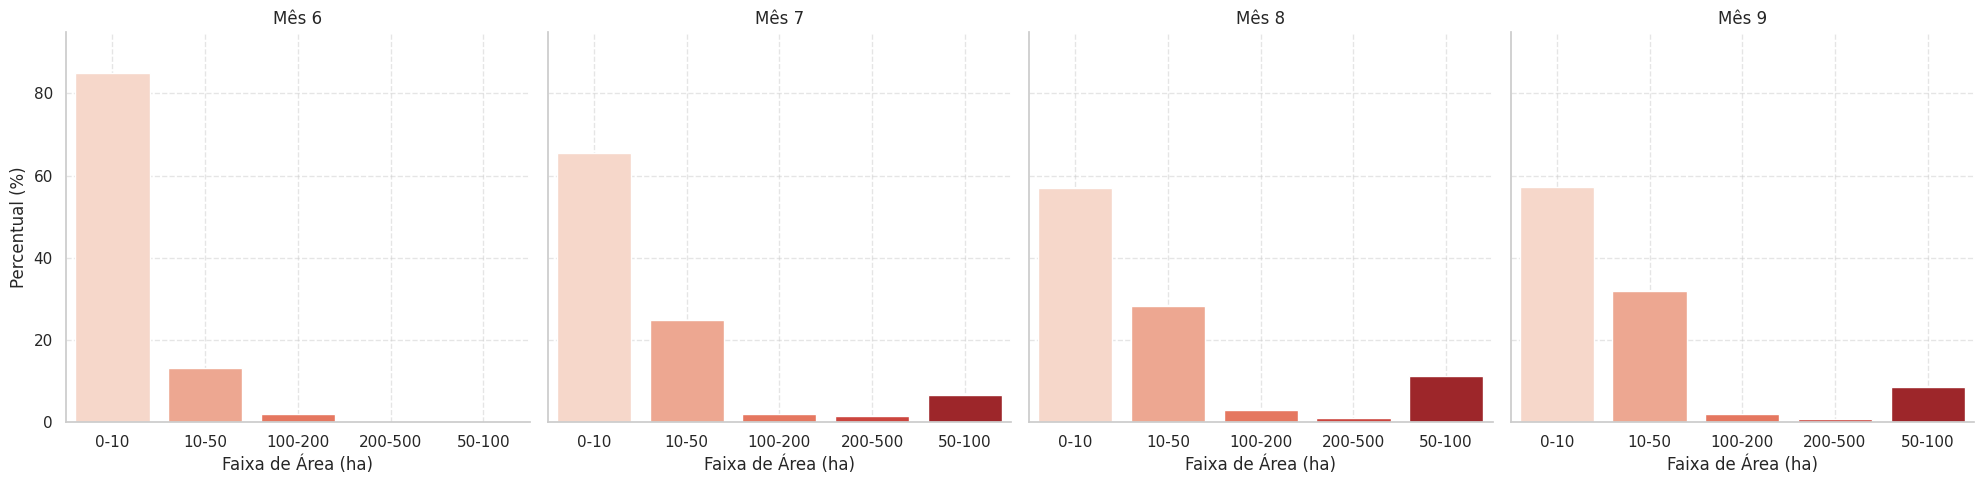

In [17]:
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

percentual_faixas_mes = df2.groupby(['mes', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_mes['Percentual (%)'] = percentual_faixas_mes.groupby('mes')['count'].transform(lambda x: x/x.sum()*100)

# Definir paleta de cores para as faixas
cores = sns.color_palette("Reds", n_colors=len(labels))

# Criar FacetGrid (um gráfico por mês)
g = sns.catplot(
    data=percentual_faixas_mes,
    x="faixa_area",
    y="Percentual (%)",
    hue="faixa_area",
    col="mes",
    kind="bar",
    col_wrap=4,   # 4 gráficos por linha (ajuste se quiser)
    palette=cores,
    sharey=True
)

g.set_titles("Mês {col_name}")
g.set_axis_labels("Faixa de Área (ha)", "Percentual (%)")

# Adicionar grid em todos os gráficos
for ax in g.axes.flatten():
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, percentual_faixas_mes['Percentual (%)'].max() + 10)  # ajustar limite y

plt.tight_layout()
plt.show()


In [18]:
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

percentual_faixas_mes = df2.groupby(['mes', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_mes['Percentual (%)'] = percentual_faixas_mes.groupby('mes')['count'].transform(lambda x: x/x.sum()*100)

fig = px.bar(percentual_faixas_mes, x='faixa_area', y='Percentual (%)', color='faixa_area',
             facet_col='mes', title='Distribuição de Áreas Desmatadas por Faixa e Mês',
             labels={'faixa_area':'Faixa (ha)', 'Percentual (%)':'% dos casos'},
             category_orders={'faixa_area': labels})

fig.update_layout(showlegend=False)
fig.show()



##
Distribuição de áreas desmatadas por município (Top 10)

Para os 10 municípios com maior área desmatada, a maioria dos registros ocorre em faixas pequenas, principalmente entre 10 e 50 hectares, que é a faixa predominante em 6 dos 10 municípios.

Os municípios Nova Ponte e Conquista se destacam por apresentarem um padrão diferente: o desmatamento foi mais uniforme entre todas as faixas, indicando que eventos de diversas magnitudes ocorreram regularmente. É importante investigar os fatores que podem ter levado a esse padrão, como queimadas, expansão da fronteira agrícola ou atividades de mineração.

Mais da metade dos municípios apresenta zero registros de desmatamento na faixa de 200-500 hectares, reforçando que, em geral, os desmatamentos em municípios tendem a ser frequentes e de pequena escala, com poucos eventos extremos que elevam a média total.

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



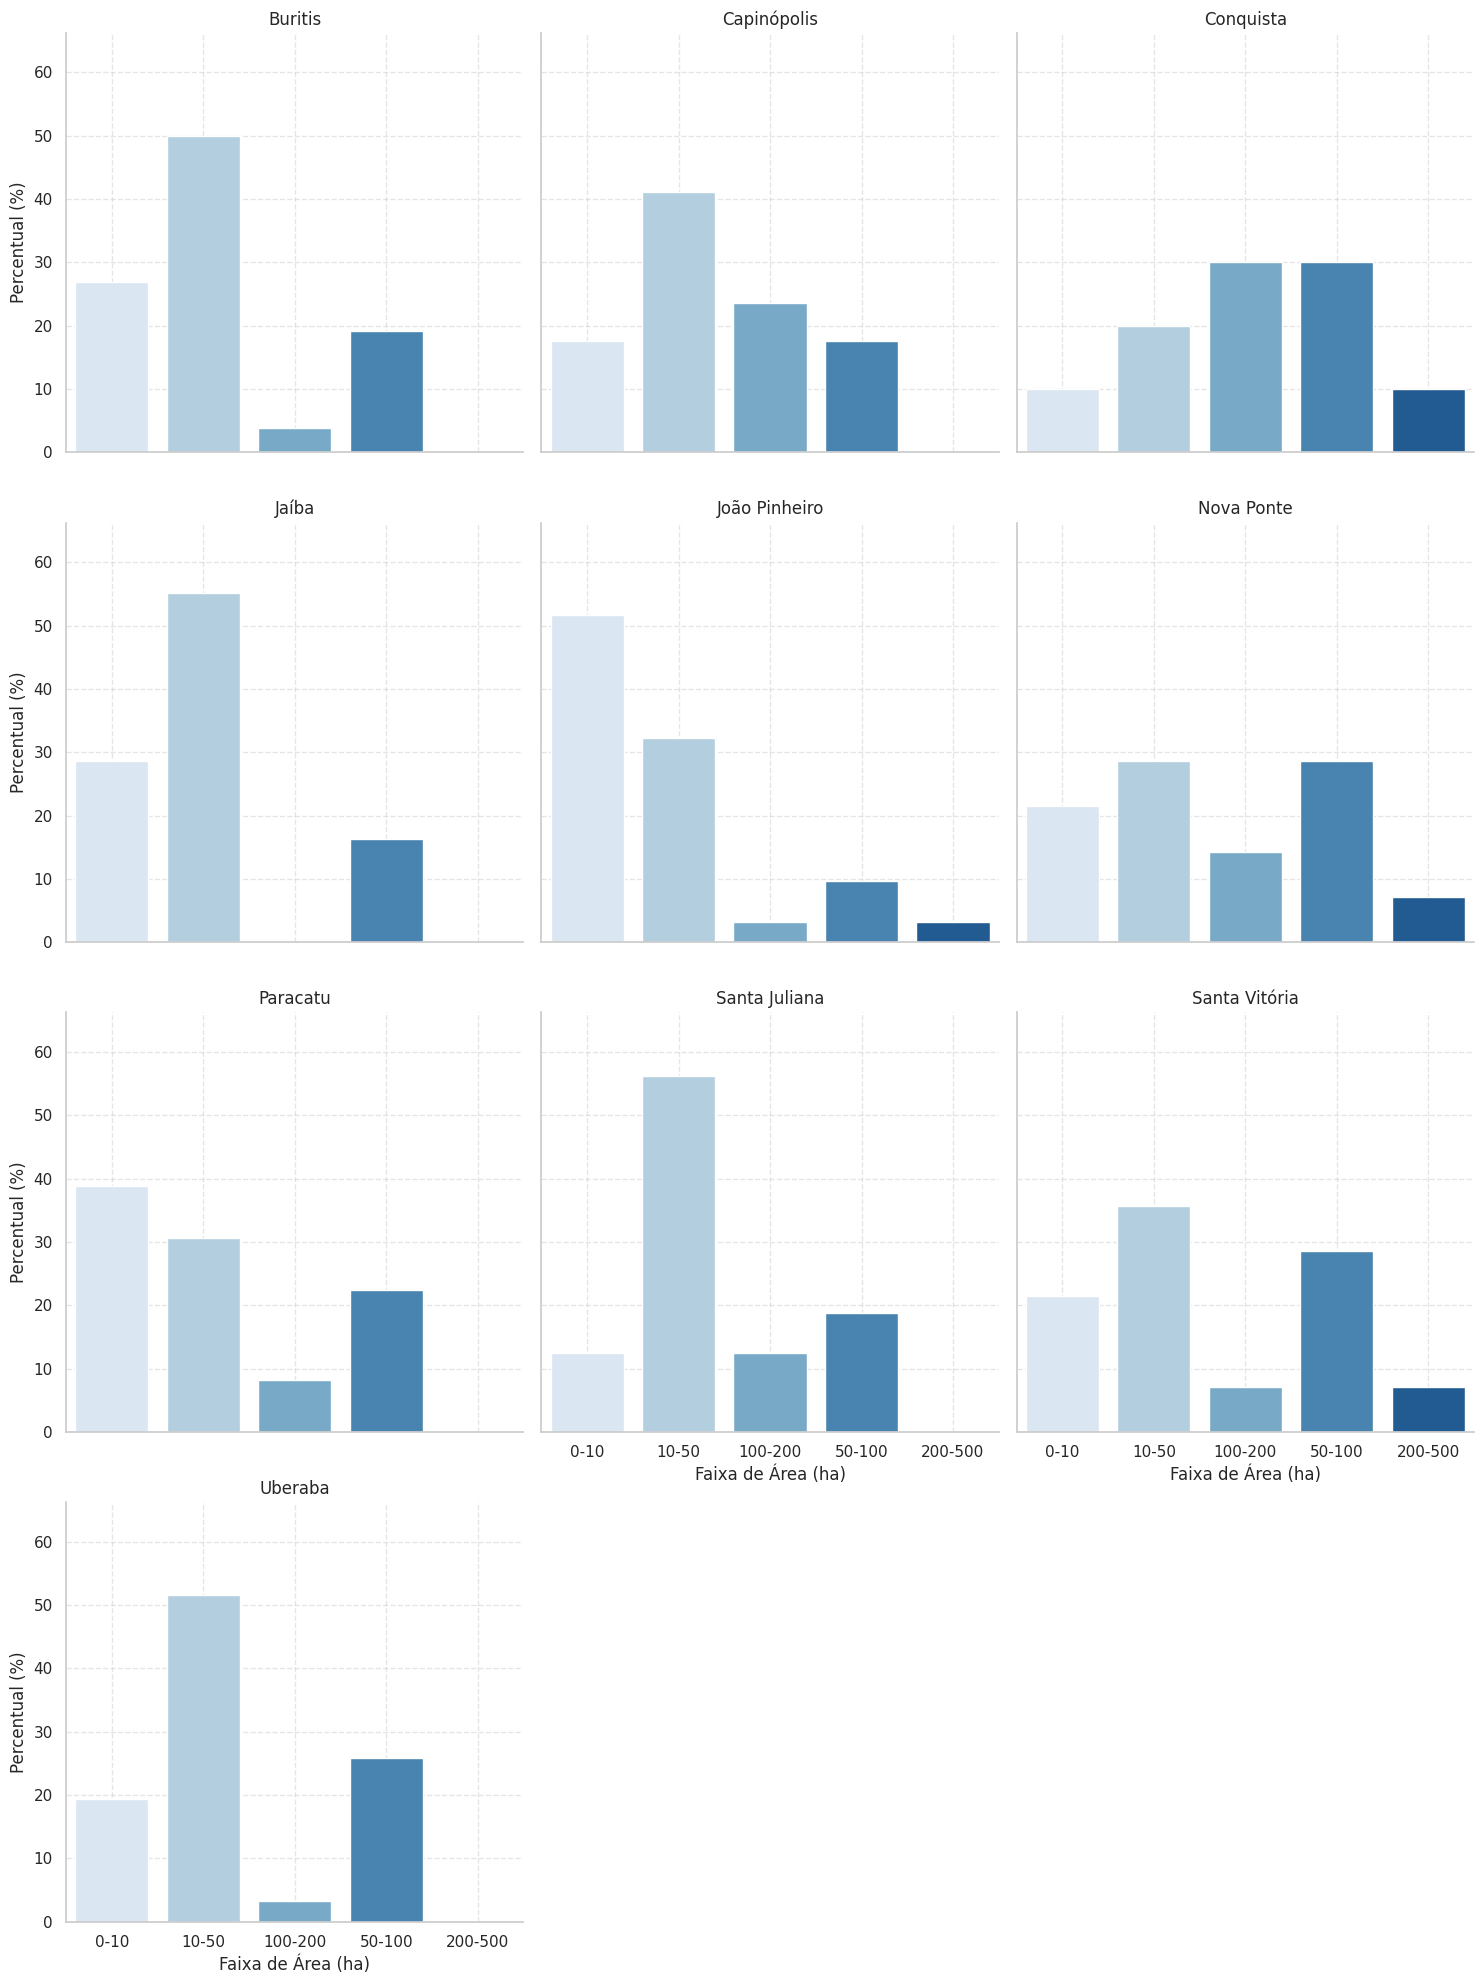

In [20]:
# Selecionar Top 10 municípios por área desmatada total
top10_municipios = df2.groupby(['municipio', 'NuFis'])['area_ha'].sum().sort_values(ascending=False).head(10)
top10_df = df2[df2['municipio'].isin(top10_municipios.index.get_level_values(0))]

# Criar faixas de área (em hectares)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
top10_df['faixa_area'] = pd.cut(top10_df['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular percentual por faixa e município
percentual_faixas_municipio = top10_df.groupby(['municipio', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_municipio['Percentual (%)'] = percentual_faixas_municipio.groupby('municipio')['count'].transform(lambda x: x/x.sum()*100)

# Definir paleta de cores para as faixas
cores = sns.color_palette("Blues", n_colors=len(labels))

# Criar FacetGrid (um gráfico por município) em 3 linhas
g = sns.catplot(
    data=percentual_faixas_municipio,
    x="faixa_area",
    y="Percentual (%)",
    hue="faixa_area",
    col="municipio",
    kind="bar",
    col_wrap=3,   # organiza em 3 linhas
    palette=cores,
    sharey=True
)

g.set_titles("{col_name}")
g.set_axis_labels("Faixa de Área (ha)", "Percentual (%)")

# Adicionar grid em todos os gráficos
for ax in g.axes.flatten():
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, percentual_faixas_municipio['Percentual (%)'].max() + 10)  # ajustar limite y

plt.tight_layout()
plt.show()


In [21]:
# Selecionar Top 10 municípios por área desmatada total
top10_municipios = df2.groupby(['municipio', 'NuFis'])['area_ha'].sum().sort_values(ascending=False).head(10)
top10_df = df2[df2['municipio'].isin(top10_municipios.index.get_level_values(0))]

# Criar faixas de área (em hectares)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
top10_df['faixa_area'] = pd.cut(top10_df['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular percentual por faixa e município
percentual_faixas_municipio = top10_df.groupby(['municipio', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_municipio['Percentual (%)'] = percentual_faixas_municipio.groupby('municipio')['count'].transform(lambda x: x/x.sum()*100)

# Gráfico de barras agrupadas por município com múltiplas linhas
fig = px.bar(percentual_faixas_municipio, x='faixa_area', y='Percentual (%)', color='faixa_area',
             facet_col='municipio', facet_col_wrap=5,  # organiza em 2 linhas (5 por linha)
             title='Distribuição de Áreas Desmatadas por Faixa e Top 10 Municípios',
             labels={'faixa_area':'Faixa (ha)', 'Percentual (%)':'% dos casos'},
             category_orders={'faixa_area': labels})

fig.update_layout(showlegend=False, height=700)  # aumenta altura da figura
fig.show()



/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##

Distribuição de áreas desmatadas por Macroregião

Excluindo a Macroregião do Triângulo Mineiro, observa-se que a faixa de 0-10 hectares concentra entre 20% e 80% dos registros de desmatamento em todas as outras regiões.

Esse padrão indica que, assim como nos municípios e biomas, o desmatamento tende a ser frequente e de pequena escala, com poucos eventos extremos que elevam a soma total. As faixas maiores (50-500 hectares) ocorrem de forma mais esparsa, contribuindo pouco para o total de registros.

Essa análise evidencia que a maioria dos desmatamentos nas Macroregiões é localizada e de baixa magnitude, sugerindo que ações de monitoramento e fiscalização devem priorizar eventos recorrentes em pequenas áreas, além de investigar os poucos casos extremos que podem impactar significativamente os números totais.

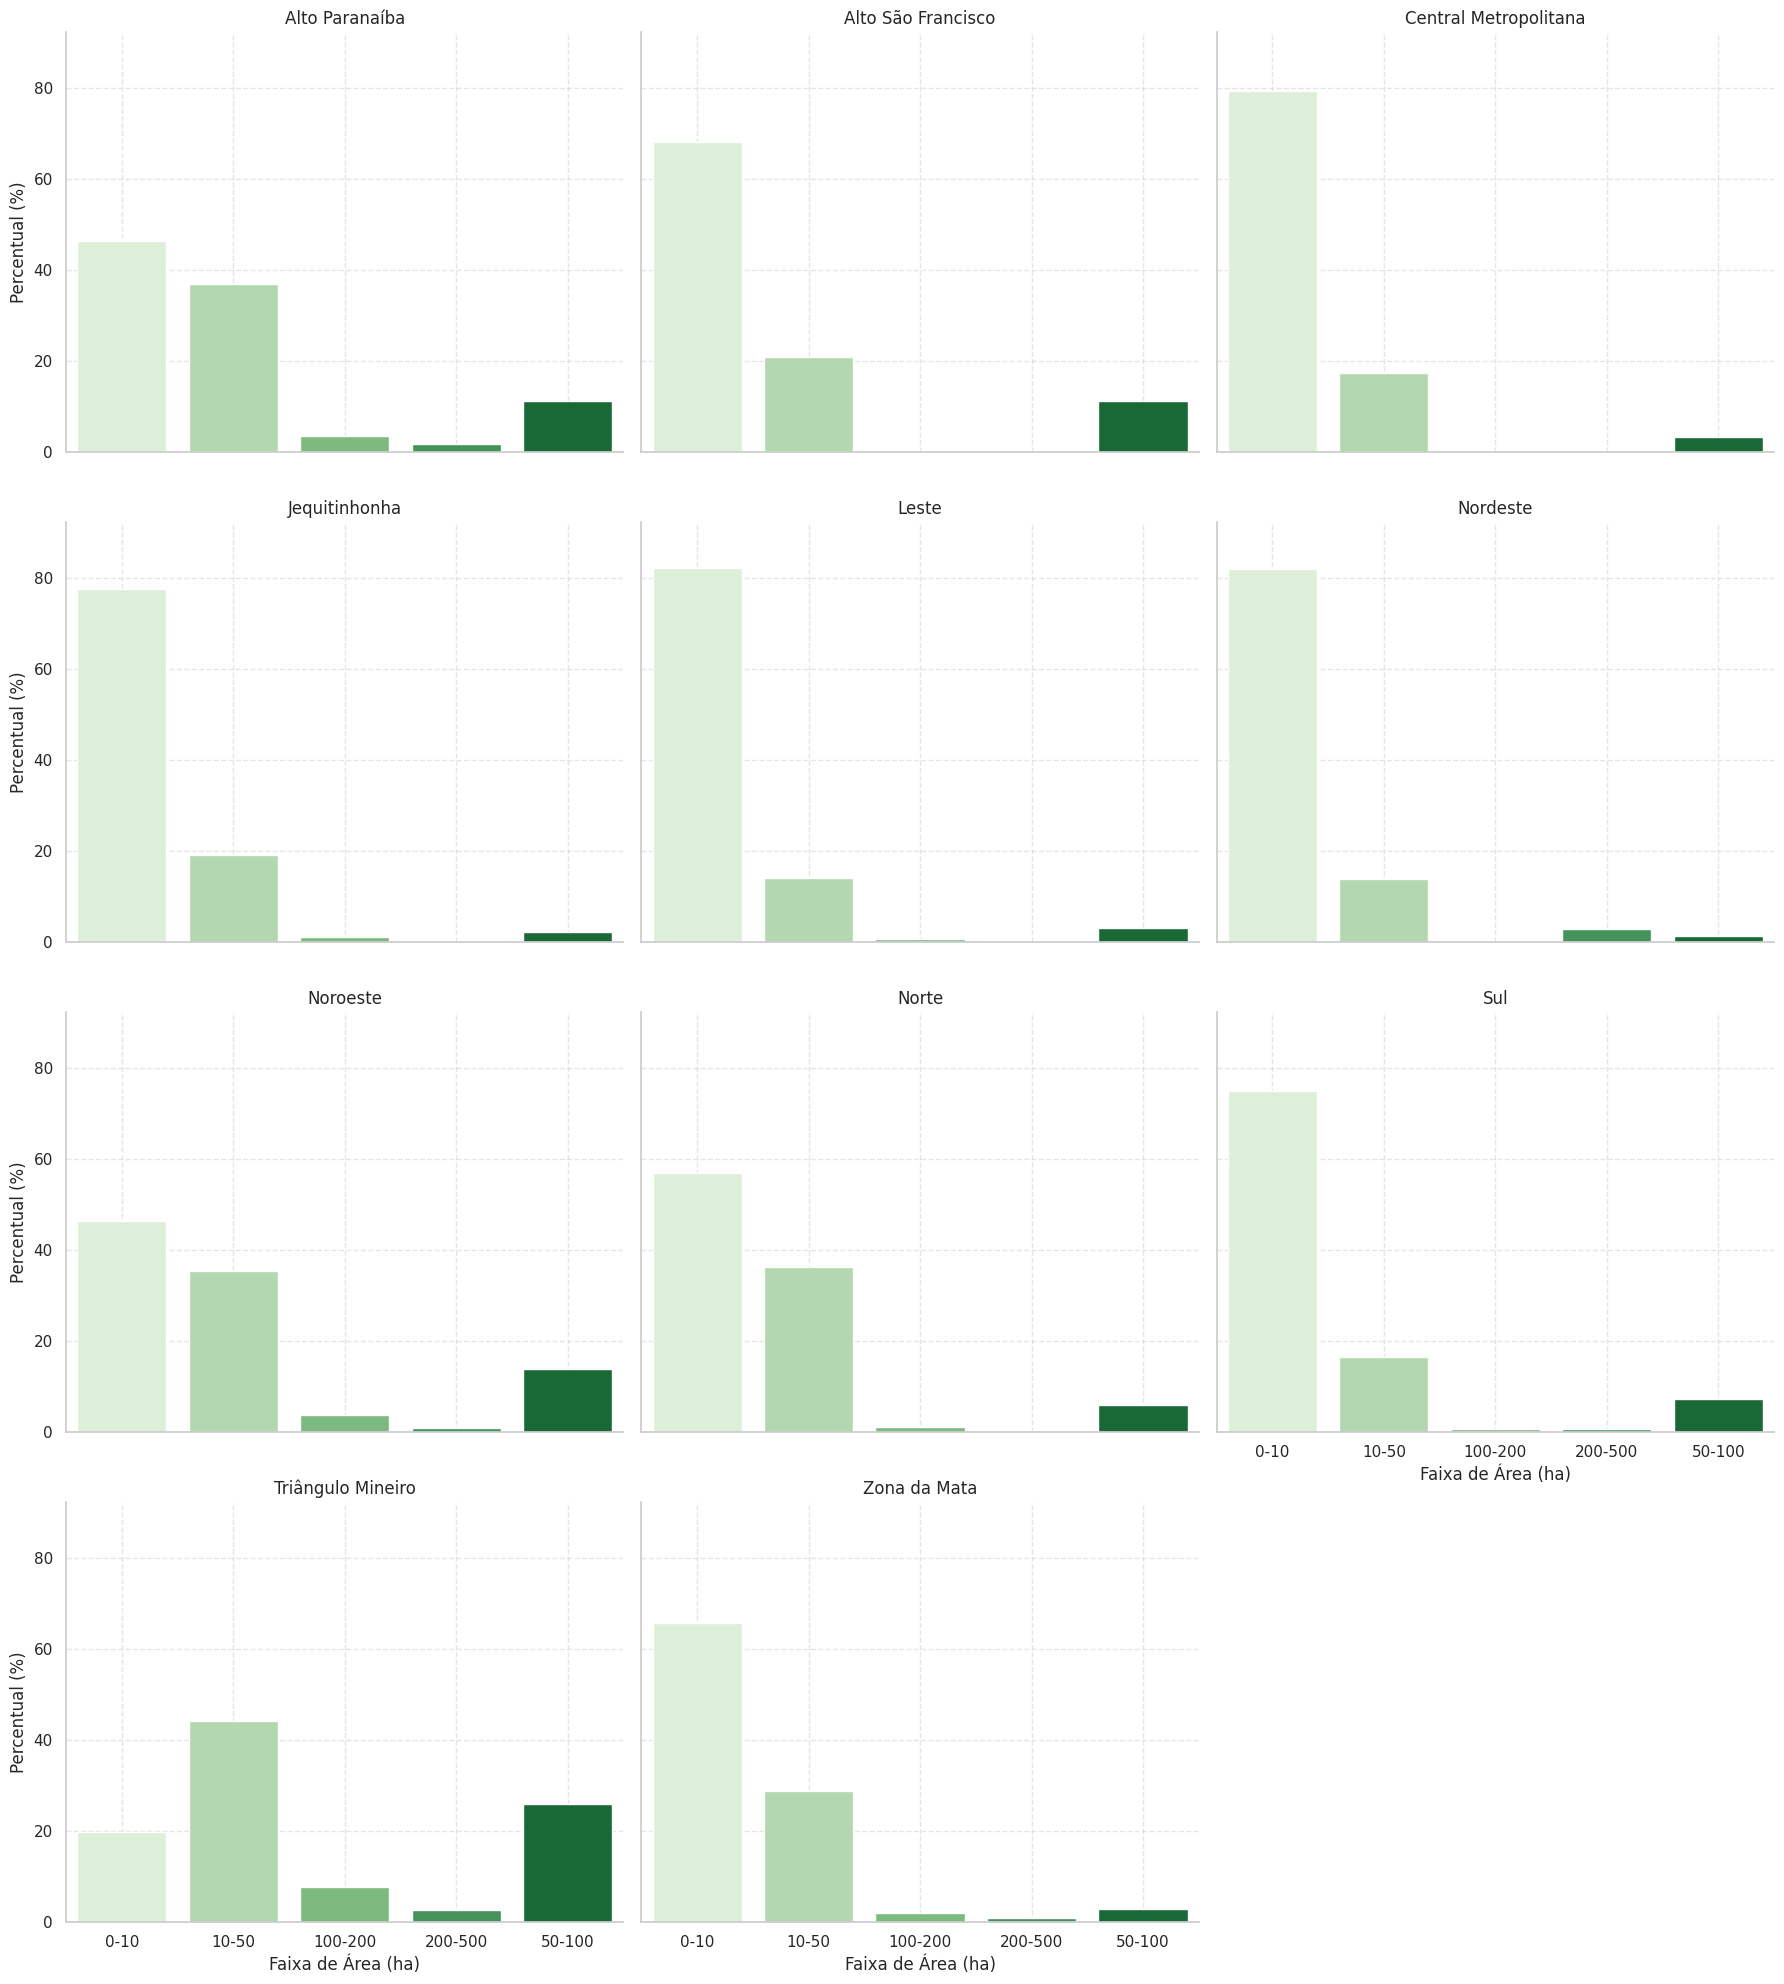

In [22]:
# Criar faixas de área (ha)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular percentual por faixa e Macroregião
percentual_faixas_nufis = df2.groupby(['NuFis', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_nufis['Percentual (%)'] = percentual_faixas_nufis.groupby('NuFis')['count'].transform(lambda x: x/x.sum()*100)

# Definir paleta de cores para as faixas
cores = sns.color_palette("Greens", n_colors=len(labels))

# Criar FacetGrid (um gráfico por Macroregião) em 3 facetas por linha
g = sns.catplot(
    data=percentual_faixas_nufis,
    x="faixa_area",
    y="Percentual (%)",
    hue="faixa_area",
    col="NuFis",
    kind="bar",
    col_wrap=3,   # 3 gráficos por linha
    palette=cores,
    sharey=True,
    height=5,     # altura de cada gráfico
    aspect=1.2    # largura relativa
)

g.set_titles("{col_name}")
g.set_axis_labels("Faixa de Área (ha)", "Percentual (%)")

# Adicionar grid em todos os gráficos
for ax in g.axes.flatten():
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_ylim(0, percentual_faixas_nufis['Percentual (%)'].max() + 10)  # ajustar limite y

plt.tight_layout()
plt.show()


In [23]:
# Criar faixas de área (ha)
bins = [0, 10, 50, 100, 200, 500]
labels = ['0-10', '10-50', '50-100', '100-200', '200-500']
df2['faixa_area'] = pd.cut(df2['area_ha'], bins=bins, labels=labels, include_lowest=True).astype(str)

# Calcular percentual por faixa e Macroregião
percentual_faixas_nufis = df2.groupby(['NuFis', 'faixa_area']).size().reset_index(name='count')
percentual_faixas_nufis['Percentual (%)'] = percentual_faixas_nufis.groupby('NuFis')['count'].transform(lambda x: x/x.sum()*100)

# Gráfico de barras facetado por Macroregião
fig = px.bar(percentual_faixas_nufis, x='faixa_area', y='Percentual (%)', color='faixa_area',
             facet_col='NuFis', facet_col_wrap=3,  # 3 facetas por linha
             title='Distribuição de Áreas Desmatadas por Faixa e Macroregião',
             labels={'faixa_area':'Faixa (ha)', 'Percentual (%)':'% dos casos', 'NuFis':'Macroregião'},
             category_orders={'faixa_area': labels})

# Ajustes de layout para aumentar altura
fig.update_layout(showlegend=False, height=1300,  # altura maior
                  title_font_size=20,
                  margin=dict(t=150))

fig.show()



# Mapa Desmatamento

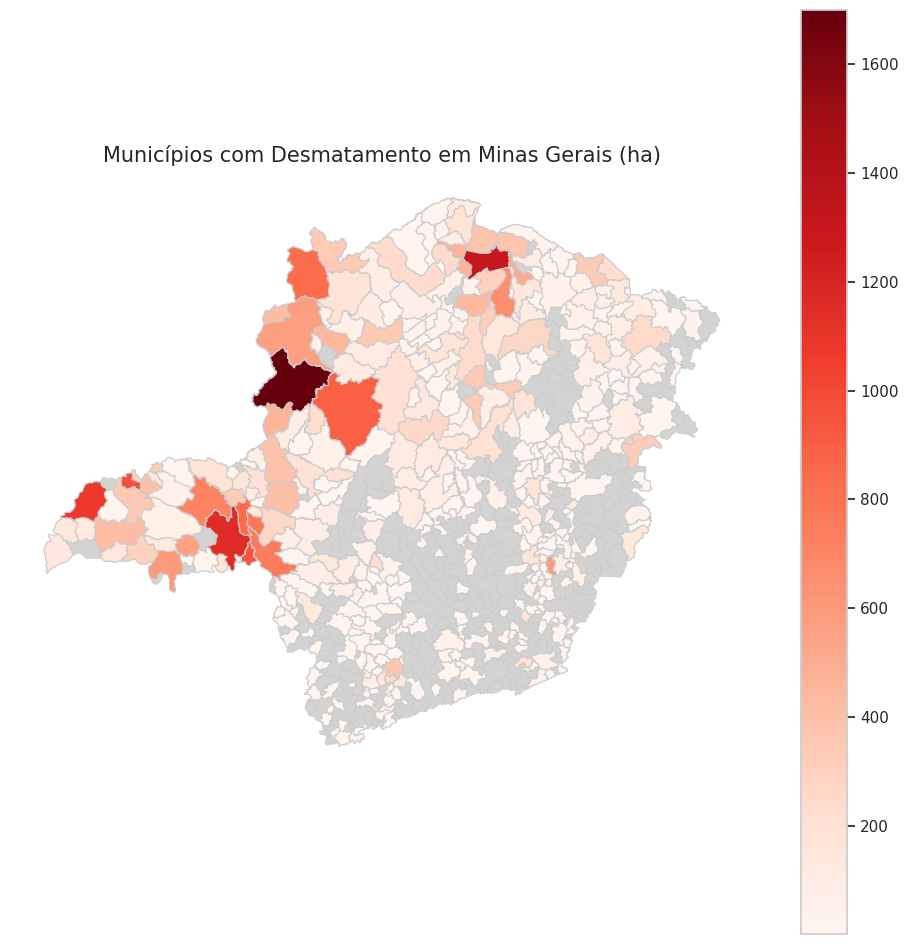

In [25]:
# Carregar o GeoJSON dos municípios de Minas Gerais
gdf_mg = gpd.read_file("municipios-mg.geojson")

# Somar a área desmatada por município
soma_municipio = df2.groupby('municipio')['area_ha'].sum().reset_index()

# Mesclar os dados de desmatamento com o GeoDataFrame
gdf_mg = gdf_mg.merge(soma_municipio, left_on='name', right_on='municipio', how='left')

# Substituir NaN por 0 (municípios sem desmatamento) sem gerar FutureWarning
gdf_mg['area_ha'] = gdf_mg['area_ha'].fillna(0)

# Criar coluna booleana: True se tiver desmatamento
gdf_mg['desmatamento'] = gdf_mg['area_ha'] > 0

# Plotar mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Todos os municípios em cinza claro
gdf_mg.plot(color='lightgray', linewidth=0.5, edgecolor='0.8', ax=ax)

# Municípios com desmatamento em vermelho
gdf_mg[gdf_mg['desmatamento']].plot(column='area_ha', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title("Municípios com Desmatamento em Minas Gerais (ha)", fontdict={'fontsize': 15, 'fontweight': '3'})
ax.axis('off')
plt.show()




In [26]:
# Somar área desmatada por município
soma_municipio = df2.groupby('municipio')['area_ha'].sum().sort_values(ascending=False)

# Top 10 municípios
top10 = soma_municipio.head(10)
num_top10 = top10.count()  # quantidade de municípios no top 10

# Restante do estado
resto = soma_municipio[10:]
num_resto = resto.count()  # quantidade de municípios no restante

# Total do estado
total_estado = soma_municipio.sum()

# Percentuais
percent_top10 = top10.sum() / total_estado * 100
percent_resto = resto.sum() / total_estado * 100

print(f"Top 10 municípios: {top10.sum():.2f} ha ({percent_top10:.2f}%) - {num_top10} municípios")
print(f"Restante do estado: {resto.sum():.2f} ha ({percent_resto:.2f}%) - {num_resto} municípios")


Top 10 municípios: 10509.40 ha (25.53%) - 10 municípios
Restante do estado: 30653.74 ha (74.47%) - 403 municípios


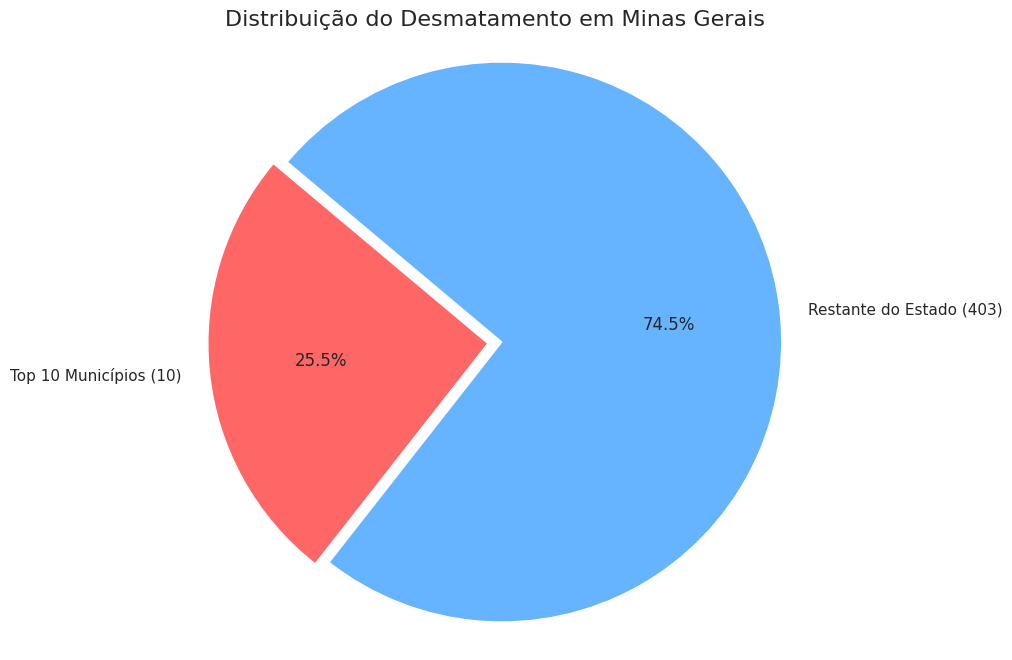

In [27]:
# Dados
valores = [top10.sum(), resto.sum()]
labels = [f'Top 10 Municípios ({num_top10})', f'Restante do Estado ({num_resto})']
cores = ['#ff6666', '#66b3ff']

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140, explode=(0.05, 0))
plt.title('Distribuição do Desmatamento em Minas Gerais', fontsize=16)
plt.axis('equal')  # Deixa a pizza circular
plt.show()


# Conclusão

Utilizando os dados acima para tomar decisões baseadas em evidências, indicaria que as regiões que mais precisam de investimento público para prevenção ao desmatamento são: o Bioma Cerrado (hotspot), as macrorregiões do Triângulo Mineiro e Norte de Minas, e, se possível, o Alto Paranaíba.

É importante verificar pessoalmente os 10 municípios que mais desmataram, pois eles representam mais de 25% do total desmatado no estado. Deve-se identificar os motivos desses desmatamentos e cobrar todas as instâncias possíveis para que isso seja reduzido, condicionando a diminuição à solicitação de recursos públicos.

Em relação ao tempo, como nossa base de dados é limitada em anos e meses, não podemos tirar conclusões definitivas; portanto, essa questão permanece em aberto até termos mais dados.

Uma conclusão adicional desta análise é que os esforços de fiscalização pública do desmatamento precisam se concentrar em pequenas parcelas de 0–50 ha.

O novo Código Florestal trouxe mudanças significativas: reduziu de 30 para 15 metros a proteção de Áreas de Preservação Permanente (APP) e Reservas Legais (RL), excluiu topos de morros como APP e anistiou desmatadores que não foram obrigados a recuperar suas APPs e RLs.

Embora a intenção do projeto fosse beneficiar pequenos proprietários (com até quatro módulos fiscais, aproximadamente 20 a 400 ha), garantindo-lhes menos restrições, na prática isso reduziu a obrigatoriedade para médios e grandes proprietários. Eles podem escolher quais áreas da RL preservar, e há casos em que propriedades em outros estados podem ser adquiridas para cumprir a lei indiretamente. Além disso, a fiscalização precisa ficar atenta a estratégias como a divisão de propriedades em lotes menores, registrados em nomes de familiares, para que grandes fazendeiros não escapem das obrigações legais.

Essa análise evidencia que, além do monitoramento do desmatamento, a fiscalização deve incluir a verificação de cumprimento das regras de preservação, especialmente nos casos em que a legislação permite brechas que favorecem proprietários maiores.